In [40]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [82]:

def minMaxScale(df):
    columns = ['High','Low','Volume']
    min_max_scaler = preprocessing.MinMaxScaler()
    normDf = df.copy()
    normDf[columns] = pd.DataFrame(min_max_scaler.fit_transform(normDf[columns]))
    return normDf

def readStock(filename):
    basePath = "/Users/shreya/dev/PROJECT_1/Finance_group_project/Resources/"
    filePath = basePath+filename
    df = pd.read_csv(filePath).dropna()
    df['Date'] = pd.to_datetime(df['Date'])
    df1 = df[['Date','High','Low','Volume']]
    
#     x = ['High','Low','Volume']
#     min_max_scaler = preprocessing.MinMaxScaler()
#     df1['High','Low','Volume'] = pd.DataFrame(min_max_scaler.fit_transform(df1[x]))
    return minMaxScale(df1)



In [84]:
fordDf = readStock("Ford.csv")
gmDf= readStock("GM.csv")
mahindraDf= readStock("M&M.NS.csv")
marutiDf= readStock("MARUTI.NS.csv")
mercedesDf= readStock("MARUTI.NS.csv")
stlaDf= readStock("STLA.csv")
tataMotorsDf= readStock("TATAMOTORS.csv")
toyotaDf= readStock("Toyota.csv")
teslaDf = readStock("TSLA.csv")
vow3Df= readStock("VOW3.DE.csv")

In [85]:
fordDf.head(10)

Date      High       Low    Volume
0 2013-01-02  0.413054  0.442920  0.223784
1 2013-01-03  0.432634  0.445370  0.374876
2 2013-01-04  0.428438  0.460069  0.156120
3 2013-01-07  0.427040  0.460069  0.119381
4 2013-01-08  0.420047  0.452719  0.128753
5 2013-01-09  0.427972  0.462028  0.098008
6 2013-01-10  0.443823  0.476237  0.255341
7 2013-01-11  0.449883  0.487016  0.198716
8 2013-01-14  0.450350  0.485056  0.128387
9 2013-01-15  0.460606  0.486526  0.158600

In [86]:
AutoMobile_df = pd.concat([fordDf,gmDf,mahindraDf,mercedesDf,stlaDf,
                          tataMotorsDf,toyotaDf,teslaDf,vow3Df])

In [87]:
AutoMobile_df.head(10)

Date      High       Low    Volume
0 2013-01-02  0.413054  0.442920  0.223784
1 2013-01-03  0.432634  0.445370  0.374876
2 2013-01-04  0.428438  0.460069  0.156120
3 2013-01-07  0.427040  0.460069  0.119381
4 2013-01-08  0.420047  0.452719  0.128753
5 2013-01-09  0.427972  0.462028  0.098008
6 2013-01-10  0.443823  0.476237  0.255341
7 2013-01-11  0.449883  0.487016  0.198716
8 2013-01-14  0.450350  0.485056  0.128387
9 2013-01-15  0.460606  0.486526  0.158600

In [88]:
AutoMobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22688 entries, 0 to 2549
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    22688 non-null  datetime64[ns]
 1   High    22684 non-null  float64       
 2   Low     22684 non-null  float64       
 3   Volume  22684 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 886.2 KB


In [89]:
AutoMobile_df.head(10)

Date      High       Low    Volume
0 2013-01-02  0.413054  0.442920  0.223784
1 2013-01-03  0.432634  0.445370  0.374876
2 2013-01-04  0.428438  0.460069  0.156120
3 2013-01-07  0.427040  0.460069  0.119381
4 2013-01-08  0.420047  0.452719  0.128753
5 2013-01-09  0.427972  0.462028  0.098008
6 2013-01-10  0.443823  0.476237  0.255341
7 2013-01-11  0.449883  0.487016  0.198716
8 2013-01-14  0.450350  0.485056  0.128387
9 2013-01-15  0.460606  0.486526  0.158600

In [90]:
AutoMobile_df.groupby('Date')[['High','Low','Volume']].mean()

High       Low    Volume
Date                                    
2013-01-01  0.102932  0.116431  0.032780
2013-01-02  0.213810  0.233270  0.122787
2013-01-03  0.216418  0.234956  0.126092
2013-01-04  0.215005  0.238389  0.094290
2013-01-07  0.213552  0.235734  0.076368
...              ...       ...       ...
2023-01-13  0.493667  0.511290  0.137713
2023-01-16  0.664934  0.693683  0.044766
2023-01-17  0.502577  0.522141  0.141808
2023-01-18  0.394735  0.412762  0.162798
2023-01-19       NaN       NaN       NaN

[2609 rows x 3 columns]

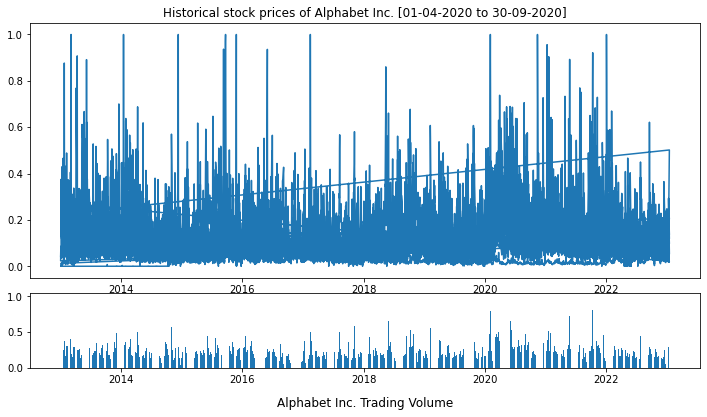

In [92]:
start_date = pd.to_datetime('2013-01-01')
end_date = pd.to_datetime('2023-01-18')                         
#df['Date'] = pd.to_datetime(df['Date']) 
new_df = (AutoMobile_df['Date']>= start_date) & (AutoMobile_df['Date']<= end_date)
df1 = AutoMobile_df.loc[new_df]
stock_data = df1.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["Volume"])
plt.title('Historical stock prices of Alphabet Inc. [01-04-2020 to 30-09-2020]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['Volume'])
plt.title('\nAlphabet Inc. Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

In [93]:
AutoMobile_df.to_csv('Scaled_Data.csv', encoding='utf-8')

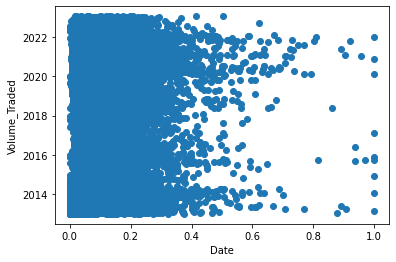

In [100]:
plt.scatter(AutoMobile_df.Volume, AutoMobile_df.Date)
plt.ylabel('Volume_Traded')
plt.xlabel('Date')
plt.show()